In [2]:
# importando as bibliotecas
from os import name
import plotly.express as px
import pandas as pd
# bibliotecas que só serão usadas na próxima avaliação 
import dash 
import dash_core_components as dcc
import dash_html_components as html


# criando os data frames 
df1 = pd.read_excel("indicadoressegurancapublicauf.xlsx")
df2 = pd.read_csv("regioesbrasileiras.csv", sep=";")

# transformando os data frames em listas
data1 = df1.values.tolist()
data2 = df2.values.tolist()

C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:7: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import sys
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:8: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  


In [4]:
crime = []
ocorrencias = []

# coloca os elementos anteriores a 2021 em listas por categoria
for linha in data1:
    if linha[2] != 2021: # linha[2] = ano   
        crime.append(linha[1]) # linha[1] = crime
        ocorrencias.append(linha[4]) # linha[4] = ocorrencia

In [6]:
#criando uma tabela com a região
regiao = []
for c in range (0,len(data2)): #percorrendo o data2
    for d in range (0,len(data1)): #percorrendo o data1
        if data1[d][2] != 2021: # o d corresponde a coluna, data1[d][2] = ano
            if data2[c][1] == data1[d][0]: #comparando o nome do estado no data2 com o nome do estado no data1
                regiao.append(data2[c][0]) # adiciona na lista 'regiao' o nome da região correspondente àquele estado

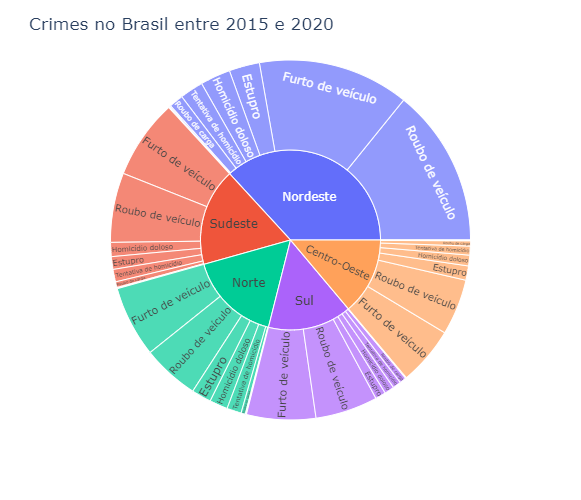

In [9]:
# grafico

df = dict(regioes=regiao, crimes=crime, ocorrencias=ocorrencias) #informações que estarão no gráfico

#as ocorrencias são os valores tanto das regiões, quanto dos crimes
#o path é utilizado para atribuir os valores (as ocorrencias) para 'regioes' e 'crimes'

fig = px.sunburst(df, path=['regioes', 'crimes'], values='ocorrencias')

fig.update_layout(
    height = 500, #tamanho do gráfico em px
    title =  {"text": "Crimes no Brasil entre 2015 e 2020"} #título
)

fig
#pag = dash.Dash()

#pag.layout = html.Div([
#    html.H1('Crimes Brasil 2015 - 2020'),
#    html.Br(),
#    dcc.Graph(figure = fig)
#])

#pag.run_server(use_reloader = False, debug = True)